## motion detection example 1
### amir 2023

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ready_2_show(a, level=255):
    a = ( a - np.min(a) ) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)

### Differential motion detection

In [3]:

cap = cv2.VideoCapture("OF_samples/10231.mp4")
print( type(cap) )
ret, frame1 = cap.read() 
N=13
for i in range(N): 
    ret , frtmp = cap.read()
ret, frame2 = cap.read()

<class 'cv2.VideoCapture'>


In [4]:
ans1 = input('Convert to Gray Scale? ')
if (ans1=='Y' or ans1=='y'): 
    frame1 = np.mean(frame1 , 2)
    frame2 = np.mean(frame2 , 2)

In [5]:
print( type(frame2) , frame2.shape )

<class 'numpy.ndarray'> (1920, 1080)


In [6]:
ans2 = input('Apply a Gaussian lowpass filter? ')
if (ans2=='Y' or ans2=='y'): 
    gflt = np.array( [ [1 , 2 , 1 ] , [2 , 4 , 2] , [1 , 2 , 1]]) / 16
    frame1 = cv2.filter2D(src=frame1, ddepth=-1, kernel=gflt)
    frame2 = cv2.filter2D(src=frame2, ddepth=-1, kernel=gflt)


In [7]:
# showing the results
cv2.namedWindow("frame 1", cv2.WINDOW_NORMAL)
cv2.imshow('frame 1' , np.uint8(frame1) ) 
cv2.namedWindow("frame 2", cv2.WINDOW_NORMAL)
cv2.imshow('frame 2' , np.uint8(frame2) )


In [8]:
diff1 = np.abs(frame1 - frame2)

Text(0.5, 1.0, 'Motion')

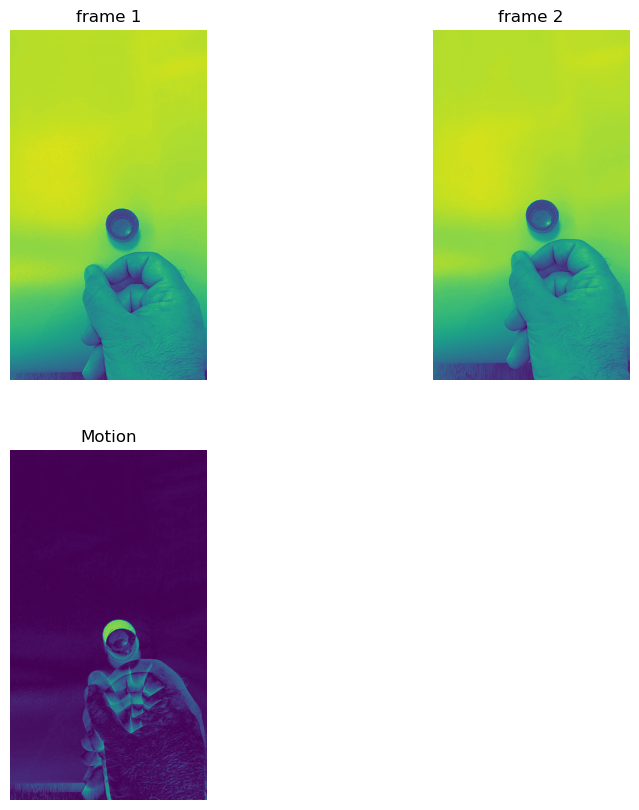

In [9]:


# create figure
fig = plt.figure(figsize=(10,10))

# setting values to rows and column variables
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(frame1)
plt.axis('off')
plt.title("frame 1")

fig.add_subplot(rows, columns, 2)
plt.imshow(frame2)
plt.axis('off')
plt.title("frame 2")

fig.add_subplot(rows, columns, 3)
plt.imshow(diff1)
plt.axis('off')
plt.title("Motion")

### Cummulative Difference, 
#### only for Gray level frames, no Gaussian filtering
#### 

In [10]:

cap = cv2.VideoCapture("OF_samples/10231.mp4")
ret, frame1 = cap.read()
frame1 = np.mean(frame1 , 2)
dcum = np.zeros(frame1.shape)
for i in range(N): 
    ret , frtmp = cap.read()
    frtmp = np.mean(frtmp , 2)
    dcum += (i/N)*np.abs(frame1-frtmp)


Text(0.5, 1.0, 'Cummulative Difference')

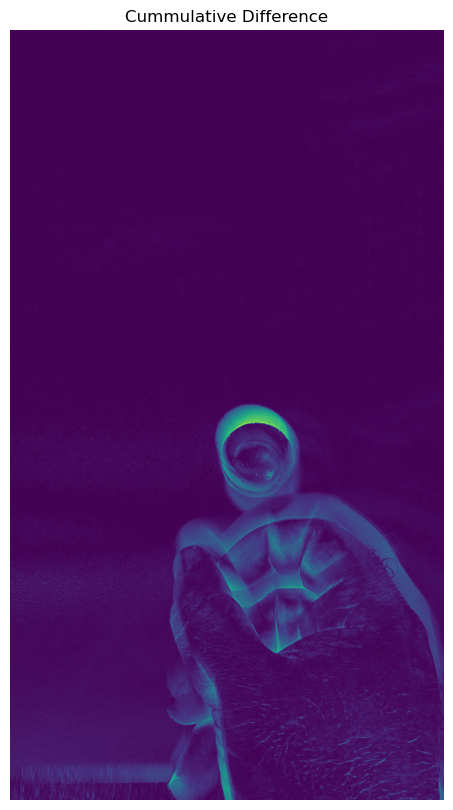

In [11]:
fig2 = plt.figure(figsize=(10,10))

plt.imshow(ready_2_show(dcum))
plt.axis('off')
plt.title("Cummulative Difference")

In [12]:
# showing the results
cv2.namedWindow("Cummulative Difference", cv2.WINDOW_NORMAL)
cv2.imshow('Cummulative Difference' , ready_2_show(dcum) ) 

In [13]:
###cv2.imwrite('..\\frame36_gl_lp.png' , frame2)

In [14]:
cv2.waitKey()
cv2.destroyAllWindows()